In [19]:
import numpy as np 
import pandas as pd 

In [20]:
# install transformers
# !pip install "transformers ==4.33.1"
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Define XMLR Pretrained model with custom classification head**

In [21]:
import torch
from transformers import XLMRobertaModel
from torch import nn

class CustomXLMRobertaForClassification(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaForClassification, self).__init__()
        self.num_labels = num_labels 
        self.roberta = XLMRobertaModel.from_pretrained("xlm-roberta-base")
        self.classifier = CustomRobertaClassificationHead(input_size=self.roberta.config.hidden_size, hidden_size=768, num_labels=num_labels)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        logits = self.classifier(pooled_output)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            return loss,logits
        else:
            return logits
       



In [22]:
class CustomRobertaClassificationHead(nn.Module):
    def __init__(self, input_size, hidden_size, num_labels):
        super(CustomRobertaClassificationHead, self).__init__()
        self.dense = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.additional_linear = nn.Linear(768, 768)
        self.out_proj = nn.Linear(hidden_size, num_labels)

    def forward(self, x):
        x = self.dropout(x)
        batch_size = x.size(0)
        x = x.view(-1, x.size(-1))
        x = nn.functional.relu(self.dense(x))
        x = self.dropout(x)
        x = x.view(batch_size, -1, 768)
        x = nn.functional.relu(self.additional_linear(x))
        x = self.dropout(x)
        x = x.mean(dim=1)
        x = self.out_proj(x)
        return x

# Create an instance of the custom model
# model = CustomXLMRobertaForClassification(num_labels=len(set(target)))
model = CustomXLMRobertaForClassification(num_labels=2)



In [23]:
model

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

**Define Scheduler and epochs**

In [24]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')


Using GPU: Tesla T4


In [25]:
num_labels=2
# Load model state dict
model = CustomXLMRobertaForClassification(num_labels)
model.load_state_dict(torch.load('/kaggle/input/xlmr/transformers/xlm_eng_finetuned/1/custom_model_eng_finetuned.pth'))

<All keys matched successfully>

In [26]:
model

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

In [27]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')

Using GPU: Tesla T4


In [28]:
model.to(device)

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

In [29]:
import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns
df = pd.read_csv('/kaggle/input/mr-dataset/marathi_preprocessed_2.csv')
print(df.head())

                                                                                                                     tweet  \
0                 आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगावचे रहिवासी माजी सैनिक सोनू महाजन आले होते भाजपचे तत्कालीन…   
1                       कुणी कविता करत असतं तर कुणी कविता जगत असतं कुणी कविता वाचत असतं तर कुणाला कविताच वाचवत असते पल्लवी   
2        आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आमच्या कडे आमचा बेकायदेशीर रित्या आलेला हक्काचा औरंगजेब आहे तो एका क…   
3                            गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाषणात मोठे शब्द वापरणे ऐकले कृती करावी उद्योग भी…   
4  कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब होऊन प्रदर्शित होणार आहे जर ह्या चित्रपटाला चांगला प्रतिसाद मिळाला तर आप…   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  


In [30]:
# load tokens
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [31]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in df.tweet.values[0].split()})

{'आजच्या': [3264, 2869], 'जनता': [27620], 'दरबारात': [208231, 2535], 'जळगाव': [231172], 'जिल्ह्यातील': [168231], 'चाळीसगावचे': [15179, 24718, 1472, 58733, 3360], 'रहिवासी': [774, 15159, 105346], 'माजी': [138139], 'सैनिक': [120458], 'सोनू': [120629, 5673], 'महाजन': [10373, 14136], 'आले': [21409], 'होते': [8358], 'भाजपचे': [75319, 3360], 'तत्कालीन…': [159136, 27]}


In [32]:
#drop null values
df = df.dropna()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split df2 into training and testing sets (where training contains only 20%)
train_df2, test_df2 = train_test_split(df, test_size=0.9, random_state=42)


In [34]:
# identify features and target
features = test_df2.tweet.values.tolist()
target = test_df2.label.values.tolist()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  380
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

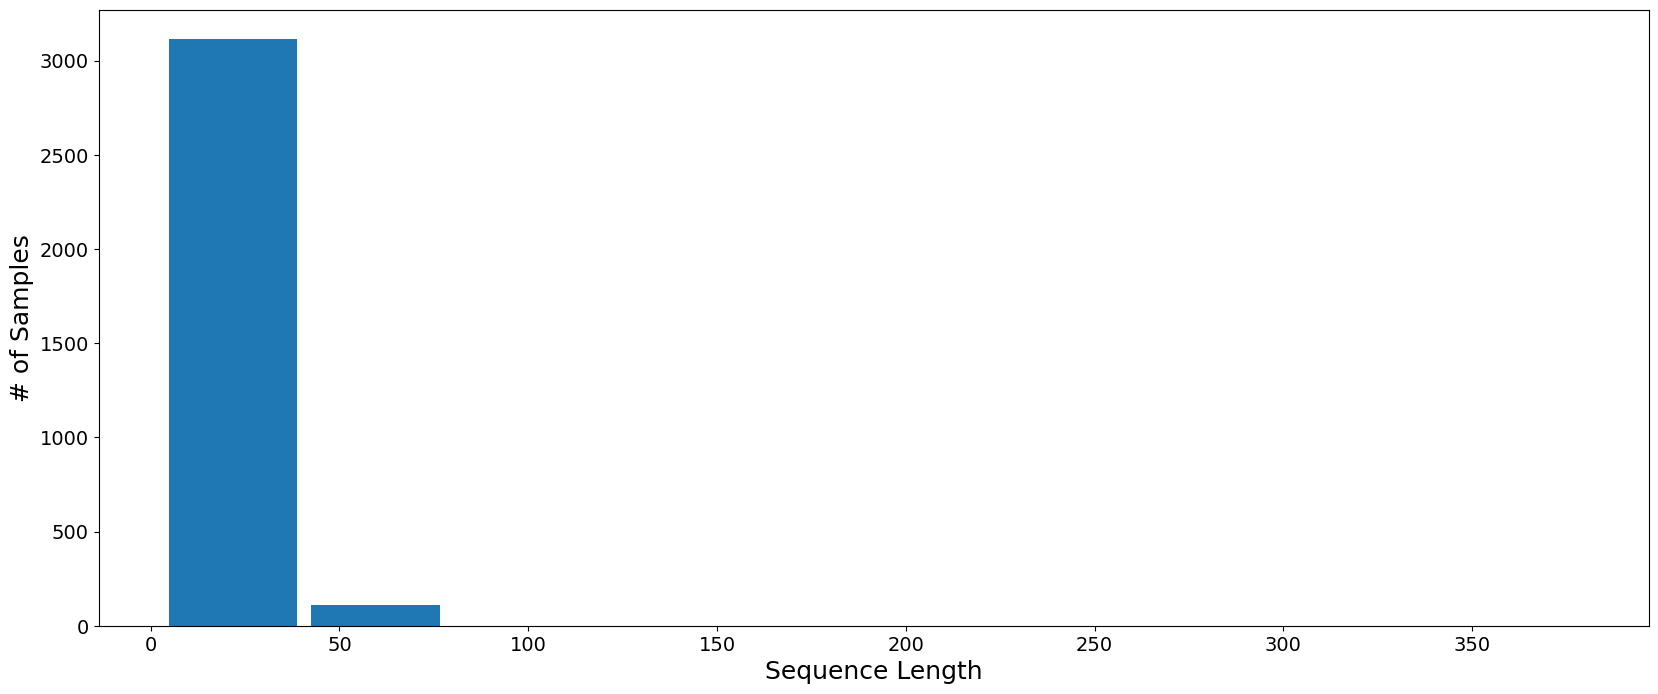

In [35]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [36]:
# tokenize features
MAX_LEN = 100
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

In [37]:
tokenized_feature['input_ids'].shape

torch.Size([3227, 100])

In [38]:
tokenized_feature['attention_mask']

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [39]:
# install transformers
# !pip install "transformers ==4.33.1"
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [40]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Assuming features and target are your tokenized features and target
features = tokenized_feature['input_ids']
masks = tokenized_feature['attention_mask']
target = target

# Convert features and target to tensors
features_tensor = torch.tensor(features)
masks_tensor = torch.tensor(masks)
target_tensor = torch.tensor(target)

# Create TensorDataset
test_data = TensorDataset(features_tensor, masks_tensor, target_tensor)

# Define batch size
batch_size = 16

# Create DataLoader with RandomSampler
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


/tmp/ipykernel_34/3427101683.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_tensor = torch.tensor(features)
/tmp/ipykernel_34/3427101683.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks_tensor = torch.tensor(masks)


# Testing

In [41]:
from sklearn.metrics import classification_report

# Testing 
model.eval()
test_preds = []
test_labels_all = []

with torch.no_grad():
    for mb_x, mb_m, mb_y in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        test_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        test_labels_all += mb_y.cpu().tolist()

# Compute and print classification report for testing
test_report = classification_report(test_labels_all, test_preds, target_names=['hate', 'non-hate']) #0 for hate
print(f'Testing report:\n{test_report}')

Testing report:
              precision    recall  f1-score   support

        hate       0.70      0.37      0.48      1045
    non-hate       0.75      0.92      0.83      2182

    accuracy                           0.74      3227
   macro avg       0.72      0.65      0.66      3227
weighted avg       0.73      0.74      0.72      3227



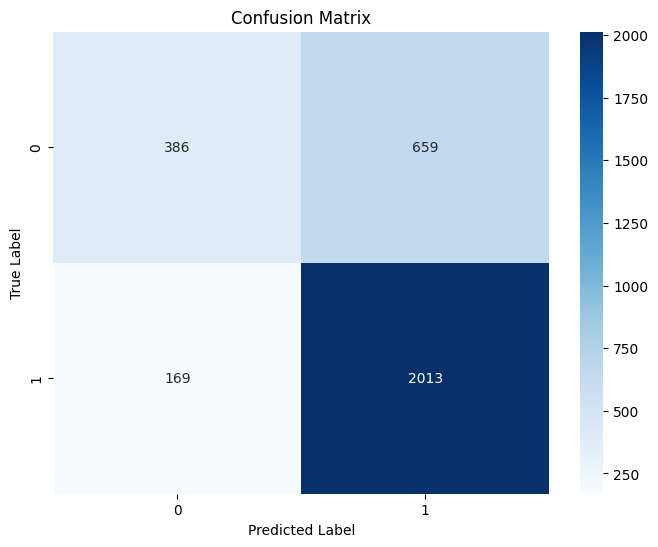

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(test_labels_all, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [43]:
from sklearn.metrics import f1_score


# Calculate F1 score
f1score = f1_score(test_labels_all, test_preds)

print("F1 Score:", f1score)


F1 Score: 0.8294190358467244


**Evaluating on english sentence**

In [44]:

# Define your input sentence
sentence = "What a shameless guy"
# Tokenize input sentence
encoding = tokenizer(sentence, return_tensors="pt")

# Move input tensors to the same device as the model
encoding = {k: v.to(device) for k, v in encoding.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**encoding)

# Get predicted logits
logits = outputs[0]

# Get predicted class index (index with the highest probability)
predicted_class_index = logits.argmax(-1).item()

# Print predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0


# Evaluating on marathi sentence- 0:Hate, 1:NonHate

In [45]:

# Define your input sentence
sentence = "अनिल परबांना रामदास कदम का म्हणाले? 'या हरामखोराला आवरा'"
# Tokenize input sentence
encoding = tokenizer(sentence, return_tensors="pt")

# Move input tensors to the same device as the model
encoding = {k: v.to(device) for k, v in encoding.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**encoding)

# Get predicted logits
logits = outputs[0]

# Get predicted class index (index with the highest probability)
predicted_class_index = logits.argmax(-1).item()

# Print predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0
